### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


**(1) What is the independent variable? What is the dependent variable?**

>- Independent variable: The words and colors that are changing throughout the experiment.     
- Dependant variable: Time spent reading the words.

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

> **The null hypotheses** ($H_{0}$): Time spent reading the incongruent words (where words don't match the color) will not be longer than the time spent reading the congruent words (no statistically significant difference).    
**The alternative hypotheses** ($H_{1}$): Participants will spend more time reading the incongruent words (increase in time).   
- $H_{0}$:  $μI$ ≤ $μC$    
- $H_{1}$:  $μI$ > $μC$  
Where:     
$μI$ is the response time mean of the incongruent population    
$μC$ is the response time mean of the congruent population

> A **dependent t-test** will be conducted since the sample set is less than 30, and we need to determine whether there is a significant difference between the means of the two groups.    
* **assumption**: The alternative hypotheses is correct, so that there is a statistically significant difference in the time spent reading the incongruent words.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
# Perform the analysis here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("stroopdata.csv")
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


> There are 24 participants that participated in both groups (Congruent & Incongruent).    
- The **Congruent sample** has a mean of **14.05s** while the **Incongruent sample** has a mean of **22.02s**. This shows that when there is a mismatch between the words and the colors, participants take more time to name the color.    
- The standard deviation of the **Congruent sample** is **3.56** and for the **Incongruent sample** it's **4.8**.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

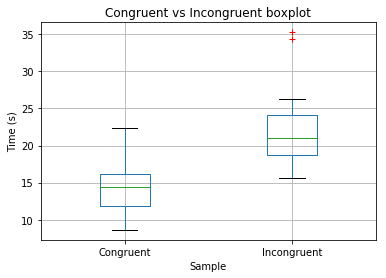

In [4]:
# Build the visualizations here
df.boxplot(sym = 'r+', widths = 0.3);
plt.title('Congruent vs Incongruent boxplot')
plt.xlabel('Sample')
plt.ylabel('Time (s)');

> From the boxplot above, we can see that **the median of the Incongruent sapmle is higher than the Congruent**. Also, there are two obvious outliers in the Incongruent sapmle.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [110]:
# Perform the statistical test here
import scipy.stats as stats

# Calculate the degree of freedom
k = 24 - 1

# Define alpha value
alpha = 0.05

# Calculate the mean difference
inc_mean = df['Incongruent'].mean()
con_mean = df['Congruent'].mean()

mean_diff = inc_mean - con_mean


# Standard deviation of Incongruent from df.describe()
sdv = 4.797057

# Calculate standard error of the difference
se = sdv / 24**(1/2)

# Calculate t-statistic 
tstat = mean_diff / se

# Find t-critical and p-value
tc = stats.t.ppf(df = k, q = alpha)
p = 1 - (stats.t.cdf(x = tstat, df = k))

In [111]:
print("t-statistic = {}\nt-critical = {}\np-value = {:0.10f}".format(tstat,tc,p))

t-statistic = 8.134018624712999
t-critical = -1.7138715277470478
p-value = 0.0000000161


> - The **confidence = 95%** , therefore alpha = 0.05. We can find the t-critical value in the t-distribution table using the values alpha(0.05) and df(23) which shows that t-statistic value is greater than the critical value.    
- The value of **p is < 0.0001** which means that there is a statistically significant difference between the two samples.    
> ### Conclusion    
The null hypothesis is rejected, as the incongruent words does take more time response. Hence there is a statistically significant difference between the two samples as expected.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

> I think that people tend to read the words while trying to pronounce the colors subconsciously which can be confusing and cause the difference in response time.    
A similar task that would result in a similar effect would be having pictures of an object shaped like another object and making participants pronounce the object in the pictures. For example, a couple of tree pictures shaped or cropped like a bicycle and the participants should say the word "tree".

#### References
Udacity statistics Lesson 33    
Stack overflow    
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/inference/supporting-topics/tests-of-means/types-of-t-tests/    
https://www.statisticshowto.datasciencecentral.com/one-sample-t-test/    
https://docs.scipy.org/doc/scipy/reference/stats.html    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t    
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html    
